In [1]:
include("../src/dependencies.jl");
pyplot()

Plots.PyPlotBackend()

In [3]:
param = ( ϵ  = 1/,
            N  = 2^14,
            L  = 10,
            T  = 5,
            dt = 0.001,
            nr = 100)

(ϵ = 0.5, N = 16384, L = 10, T = 5, dt = 0.001, nr = 100)

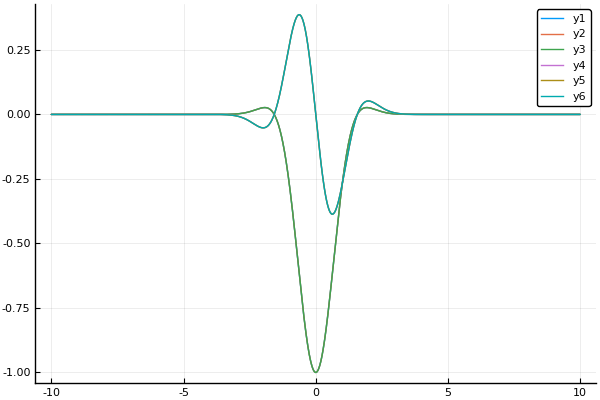

In [4]:
init1 = HighFreq(param,2,20)
init2 = HighFreq(param,2,100)
init3 = HighFreq(param,2,200)

plot(Mesh(param).x,[init1.h init2.h init3.h init1.u init2.u init3.u])

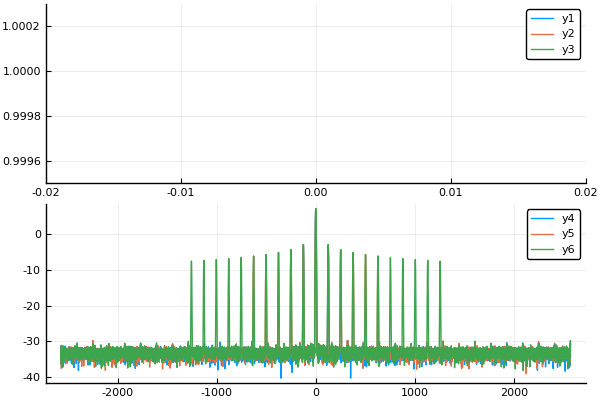

In [5]:
p = plot(layout=(2,1))
plot!(p[1,1],Mesh(param).x,[init1.h init2.h init3.h],xlims=(-.02,.02),ylims=(0.9995,1.0003))
plot!(p[2,1],Mesh(param).k,[log.(abs.(fft(init1.h))) log.(abs.(fft(init2.h))) log.(abs.(fft(init3.h)))])


In [6]:
model0    = Matsuno_mod_naive(param)
model1    = Matsuno_naive(param)
model2    = Matsuno(param)


problem01 = Problem(model0, init1, param);
problem11 = Problem(model1, init1, param);
problem21 = Problem(model2, init1, param);
problem02 = Problem(model0, init2, param);
problem12 = Problem(model1, init2, param);
problem22 = Problem(model2, init2, param);
problem03 = Problem(model0, init3, param);
problem13 = Problem(model1, init3, param);
problem23 = Problem(model2, init3, param);

problemsX1 = [ problem01, problem11, problem21 ];
problemsX2 = [ problem02, problem12, problem22 ];
problemsX3 = [ problem03, problem13, problem23 ];

problems0X = [ problem01, problem02, problem03 ];
problems1X = [ problem11, problem12, problem13 ];
problems2X = [ problem21, problem22, problem23 ];





In [ ]:
problems=problemsX3

p = plot(layout=(2,1))

for problem in problems
    print("\nNow solving the model ",problem.model.label,"\n")
    @time solve!( problem )
    fig_problem!( p, problem )
end

p


Now solving the model modified Matsuno
problem.param = (ϵ = 0.5, N = 16384, L = 10, T = 5, dt = 0.001, nr = 100)


Progress:   7%|███                                      |  ETA: 0:03:54

In [ ]:
p = plot(layout=(2,1))
for problem in problems
    fig_problem!( p, problem ,3)
end
p

In [ ]:
maximum(mapfro(model0,problem13.data.U[1000])[2].-mapfro(model0,problem03.data.U[1000])[2])

In [ ]:
maximum(mapfro(model0,problem13.data.U[1000])[2].-mapfro(model0,problem23.data.U[1000])[2])

In [ ]:
p=plot()

for problem in problems
    norm_problem!( p, problem ,2)
end
p